In [ ]:
from AJPS_full import keygen, enc, dec
from util import timer, int2string, string2int
import matplotlib.pyplot as plt
import numpy as np
from ecc import E, D
%matplotlib inline

In [5]:
ns = [11213, 19937, 21701, 23209, 44497, 86243, 110503, 132049, 216091, 756839, 859433, 1257787,
     1398269, 2976221, 3021377, 6972593, 13446917] 
#       20996011, 24036583, 25964951, 30402457, 32582657,
#      37156667, 43112609, 42643801, 57885161, 74207281, 77232917, 82589933]

AJPS FULL without GMPY2

In [ ]:
h = 256
runs = 2
rho = 256

acc = np.zeros((len(ns), 3))
correctness = np.zeros(len(ns), dtype=bool)

m = string2int("Robert DeNiro thinks that Trump will go for a third term via a war")

for i, n in enumerate(ns):
    
    p = 2**n-1

    # KEYGEN
    params = [n, h]
    time, ret = timer(keygen, params, runs)
    acc[i][0] = time
    pk, sk, _ = ret
    
    # ENCRYPTION
    params = [m, pk, p, n, h]
    time, ret = timer(enc, params, runs)
    acc[i][1] = time
    C = ret
    
    print(n, time)
    
    # DECRYPTION
    params = [C, sk, p]
    time, ret = timer(dec, params, runs)
    acc[i][2] = time
    m_prime = ret
    
    # SUCCESS?
    correctness[i] = m_prime == m

11213 0.18384528160095215
19937 0.31042778491973877
21701 0.3370788097381592
23209 0.33537447452545166
44497 0.6400866508483887
86243 1.2225446701049805
110503 1.583648443222046
132049 1.9230867624282837
216091 3.2596561908721924
756839 15.746907114982605
859433 15.038305044174194
1257787 22.51357865333557
1398269 28.391827702522278
2976221 63.92268085479736
3021377 70.58811807632446
6972593 141.02528262138367


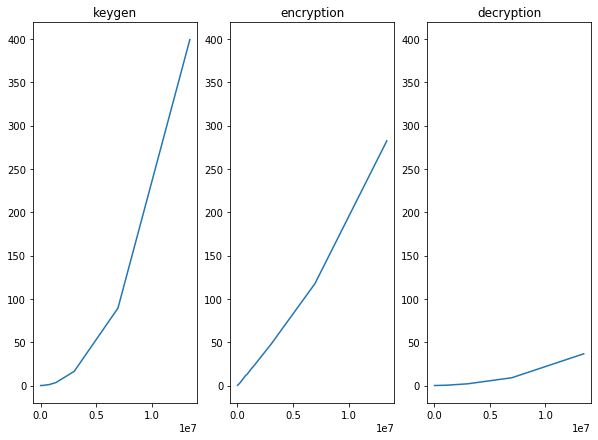

In [5]:
plt.figure(figsize=(10,7))
ax = plt.subplot(131)
ax.set(title="keygen")
_ = plt.plot(ns, acc[:, 0])
ax = plt.subplot(132, sharey=ax)
ax.set(title="encryption")
_ = plt.plot(ns, acc[:, 1])
ax = plt.subplot(133, sharey=ax)
ax.set(title="decryption")
_ = plt.plot(ns, acc[:, 2])

AJPS bit-by-bit without GMPY2

In [3]:
from AJPS_basic import keygen, enc, dec

In [6]:
h = 256
runs = 2
rho = 256

acc = np.zeros((len(ns), 3))
correctness = np.zeros(len(ns), dtype=bool)

m = 0

for i, n in enumerate(ns):
    
    p = 2**n-1

    # KEYGEN
    params = [n, h]
    time, ret = timer(keygen, params, runs)
    acc[i][0] = time
    pk, sk = ret
    
    # ENCRYPTION
    params = [m, pk, p, n, h]
    time, ret = timer(enc, params, runs)
    acc[i][1] = time
    C, signed = ret
    
    print(n, time)
    
    # DECRYPTION
    params = [C, sk, n, h, signed]
    time, ret = timer(dec, params, runs)
    acc[i][2] = time
    m_prime = ret
    
    # SUCCESS?
    correctness[i] = m_prime == m

11213 0.004098653793334961
19937 0.002877950668334961
21701 0.0028220415115356445
23209 0.0026401281356811523
44497 0.00289309024810791
86243 0.0025374889373779297
110503 0.0030421018600463867
132049 0.0027579069137573242
216091 0.002945423126220703
756839 0.005930662155151367
859433 0.0033599138259887695
1257787 0.010784268379211426
1398269 0.00881946086883545
2976221 0.014299392700195312
3021377 0.009769916534423828
6972593 0.5266731977462769
13446917 0.8724544048309326


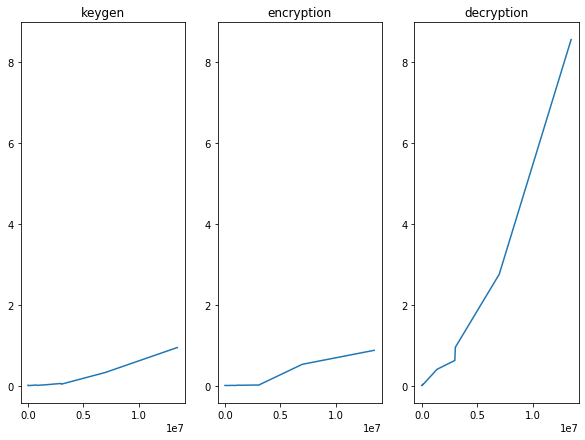

In [7]:
plt.figure(figsize=(10,7))
ax = plt.subplot(131)
ax.set(title="keygen")
_ = plt.plot(ns, acc[:, 0])
ax = plt.subplot(132, sharey=ax)
ax.set(title="encryption")
_ = plt.plot(ns, acc[:, 1])
ax = plt.subplot(133, sharey=ax)
ax.set(title="decryption")
_ = plt.plot(ns, acc[:, 2])

In [ ]:
AJPS FULL BPL without GYMP2:

In [ ]:
from AJPS_full_bpl import keygen, enc, dec

In [ ]:
h = 256
runs = 2
rho = 256

acc = np.zeros((len(ns), 3))
correctness = np.zeros(len(ns), dtype=bool)

m = string2int("Robert DeNiro thinks that Trump will go for a third term via a war")

for i, n in enumerate(ns):
    
    p = 2**n-1

    # KEYGEN
    params = [n, h, p, False]
    time, ret = timer(keygen, params, runs)
    acc[i][0] = time
    pk, sk, _ = ret
    
    # ENCRYPTION
    params = [m, pk, p, n, h]
    time, ret = timer(enc, params, runs)
    acc[i][1] = time
    C, signed = ret
    
    print(n, time)
    
    # DECRYPTION
    params = [C, sk, p]
    time, ret = timer(dec, params, runs)
    acc[i][2] = time
    m_prime = ret
    
    # SUCCESS?
    correctness[i] = m_prime == m

In [ ]:
plt.figure(figsize=(10,7))
ax = plt.subplot(131)
ax.set(title="keygen")
_ = plt.plot(ns, acc[:, 0])
ax = plt.subplot(132, sharey=ax)
ax.set(title="encryption")
_ = plt.plot(ns, acc[:, 1])
ax = plt.subplot(133, sharey=ax)
ax.set(title="decryption")
_ = plt.plot(ns, acc[:, 2])

AJPS FULL with GMPY2

In [ ]:
from gimpy import mpz
from AJPS_full import keygen, enc, dec

In [ ]:
h = mpz(256)
runs = 2
rho = 256


acc = np.zeros((len(ns), 3))
correctness = np.zeros(len(ns), dtype=bool)

m = string2int("Robert DeNiro thinks that Trump will go for a third term via a war")

for i, mpz(n) in enumerate(ns):

    
    p = mpz(2**n-1)

    # KEYGEN
    params = [n, h]
    time, ret = timer(keygen, params, runs)
    acc[i][0] = time
    pk, sk, _ = ret
    
    # ENCRYPTION
    params = [m, pk, p, n, h]
    time, ret = timer(enc, params, runs)
    acc[i][1] = time
    C = ret
    
    print(n, time)
    
    # DECRYPTION
    params = [C, sk, p]
    time, ret = timer(dec, params, runs)
    acc[i][2] = time
    m_prime = ret
    
    # SUCCESS?
    correctness[i] = m_prime == m

In [ ]:
plt.figure(figsize=(10,7))
ax = plt.subplot(131)
ax.set(title="keygen")
_ = plt.plot(ns, acc[:, 0])
ax = plt.subplot(132, sharey=ax)
ax.set(title="encryption")
_ = plt.plot(ns, acc[:, 1])
ax = plt.subplot(133, sharey=ax)
ax.set(title="decryption")
_ = plt.plot(ns, acc[:, 2])

AJPS basic with GMPY2

In [ ]:
from AJPS_basic import keygen, enc, dec

In [ ]:
h = mpz(256)
runs = 2
rho = 256

acc = np.zeros((len(ns), 3))
correctness = np.zeros(len(ns), dtype=bool)

m = 0

for i, mpz(n) in enumerate(ns):
    
    p = mpz(2**n-1)

    # KEYGEN
    params = [n, h]
    time, ret = timer(keygen, params, runs)
    acc[i][0] = time
    pk, sk = ret
    
    # ENCRYPTION
    params = [m, pk, p, n, h]
    time, ret = timer(enc, params, runs)
    acc[i][1] = time
    C, signed = ret
    
    print(n, time)
    
    # DECRYPTION
    params = [C, sk, n, h, signed]
    time, ret = timer(dec, params, runs)
    acc[i][2] = time
    m_prime = ret
    
    # SUCCESS?
    correctness[i] = m_prime == m

In [ ]:
plt.figure(figsize=(10,7))
ax = plt.subplot(131)
ax.set(title="keygen")
_ = plt.plot(ns, acc[:, 0])
ax = plt.subplot(132, sharey=ax)
ax.set(title="encryption")
_ = plt.plot(ns, acc[:, 1])
ax = plt.subplot(133, sharey=ax)
ax.set(title="decryption")
_ = plt.plot(ns, acc[:, 2])

AJPS FULL BPL with GMPY2

In [ ]:
from AJPS_full_bpl import keygen, enc, dec

In [ ]:
h = mpz(256)
runs = 2
rho = 256

acc = np.zeros((len(ns), 3))
correctness = np.zeros(len(ns), dtype=bool)

m = string2int("Robert DeNiro thinks that Trump will go for a third term via a war")

for i, mpz(n) in enumerate(ns):
    
    p = mpz(2**n-1)

    # KEYGEN
    params = [n, h, p, True]
    time, ret = timer(keygen, params, runs)
    acc[i][0] = time
    pk, sk, _ = ret
    
    # ENCRYPTION
    params = [m, pk, p, n, h]
    time, ret = timer(enc, params, runs)
    acc[i][1] = time
    C, signed = ret
    
    print(n, time)
    
    # DECRYPTION
    params = [C, sk, p]
    time, ret = timer(dec, params, runs)
    acc[i][2] = time
    m_prime = ret
    
    # SUCCESS?
    correctness[i] = m_prime == m

In [ ]:
plt.figure(figsize=(10,7))
ax = plt.subplot(131)
ax.set(title="keygen")
_ = plt.plot(ns, acc[:, 0])
ax = plt.subplot(132, sharey=ax)
ax.set(title="encryption")
_ = plt.plot(ns, acc[:, 1])
ax = plt.subplot(133, sharey=ax)
ax.set(title="decryption")
_ = plt.plot(ns, acc[:, 2])